<a href="https://colab.research.google.com/github/timoshenko4618/portfolio/blob/master/Visualization_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

df_iris = pd.read_csv('/content/drive/MyDrive/Uploaded/iris.csv')
idx = list(df_iris.index) 

In [ ]:
# Создание списка цветочных сортов
flowers = df_iris['variety'].unique()

# Создание списка средних значений sepal.lenght для каждого сорта
len_list = [ df_iris.loc[df_iris['variety'] == name, ['sepal.length']].mean() 
             for name in flowers ]

len_list = list(np.concatenate(len_list).flat)
flowers, len_list       

(array(['Setosa', 'Versicolor', 'Virginica'], dtype=object),
 [5.006, 5.936, 6.587999999999998])

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
AutoMinorLocator)

#    1. Графики    

---



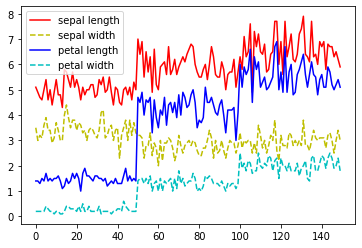

In [ ]:
plt.plot(df_iris['sepal.length'], 'r-',
         df_iris['sepal.width'],  'y--',
         df_iris['petal.length'], 'b-',
         df_iris['petal.width'],  'c--')

plt.legend(['sepal length', 'sepal width','petal length','petal width'])

# 2. График с сеткой 

---



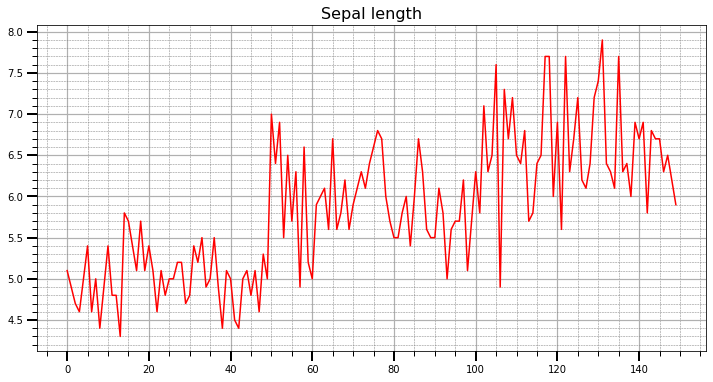

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Sepal length', fontsize=16)

ax.grid(which='major', linewidth=1.2)
ax.grid(which='minor', linestyle='--', color='gray', linewidth=0.5)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major', length=10, width=2)
ax.tick_params(which='minor', length=5, width=1)

ax.plot(df_iris['sepal.length'], c='red')

plt.show()

# 3. Гистограмма с сеткой 

---

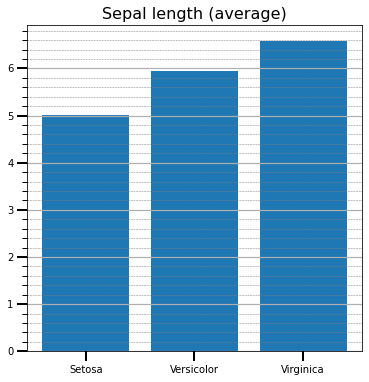

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Sepal length (average)', fontsize=16)

ax.grid(which='major', axis = 'y', linewidth=1.2)
ax.grid(which='minor', linestyle='--', axis = 'y', color='gray', linewidth=0.5)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major', length=10, width=2)
ax.tick_params(which='minor', length=5, width=1)

ax.bar(flowers, len_list)

plt.show()

#  4. Линейная гистограмма

---


In [ ]:
# Сначала создаем DataFrame со средними значениями каждого параметра для каждого сорта цветов
flowers = df_iris['variety'].unique()         
value_names = df_iris.columns.tolist()
del value_names[-1]

height = 3
width = 4
df_iris_mean = pd.DataFrame(0.0, index = flowers, columns = value_names)

for name in flowers:
  df_name = df_iris.loc[df_iris['variety'] == name]

  for parameter in value_names:
    df_iris_mean.loc[name][parameter] = df_name[parameter].mean()


df_iris_mean

,sepal.length,sepal.width,petal.length,petal.width
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


Text(0.5, 1.0, 'Средние значения по сортам')

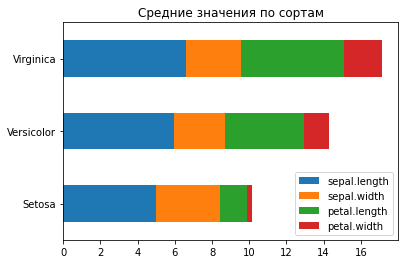

In [ ]:
df_iris_mean.plot.barh(stacked=True)
plt.title('Средние значения по сортам')

# 5. Гистограмма с отклонениями

---



In [ ]:
# Создание списка отклонений от средних значений sepal.lenght для каждого сорта
len_var_list = [ df_iris.loc[df_iris['variety'] == name, ['sepal.length']].var() 
                 for name in flowers ]
                 
len_var_list = list(np.concatenate(len_var_list).flat)
len_var_list                 

[0.12424897959183677, 0.2664326530612245, 0.4043428571428573]

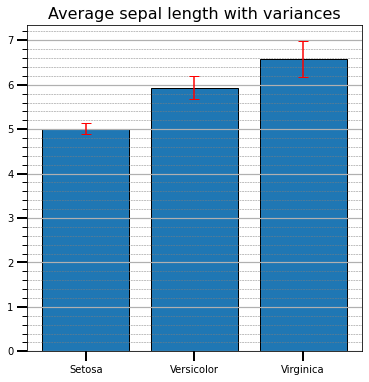

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Average sepal length with variances', fontsize=16)

ax.grid(which='major', axis = 'y', linewidth=1.2)
ax.grid(which='minor', linestyle='--', axis = 'y', color='gray', linewidth=0.5)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major', length=10, width=2)
ax.tick_params(which='minor', length=5, width=1)

ax.bar(flowers, len_list, edgecolor = 'black', linewidth = 1)

plt.errorbar(flowers, len_list, yerr = len_var_list, fmt = 'none', capsize = 5, color="r")

plt.show()

# 6. Гистограмма с разными цветами

---



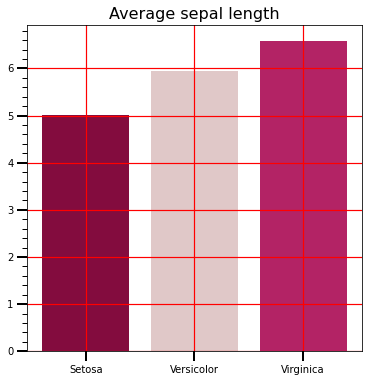

In [ ]:
#color_list = ['red', 'blue', 'green']
color_rectangle = np.random.rand(3, 3)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Average sepal length', fontsize=16)

ax.grid(which='major', axis = 'y', color='red', linewidth=1.2)
ax.grid(which='major', axis = 'x', color='red',linewidth=1.2)
ax.grid(which='minor', linestyle='--', axis = 'x', color='gray', linewidth= 0.5)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major', length=10, width=2)
ax.tick_params(which='minor', length=5, width=1)

ax.bar(flowers, len_list, color = color_rectangle)

plt.show()

# 7. Цветная сетка

---



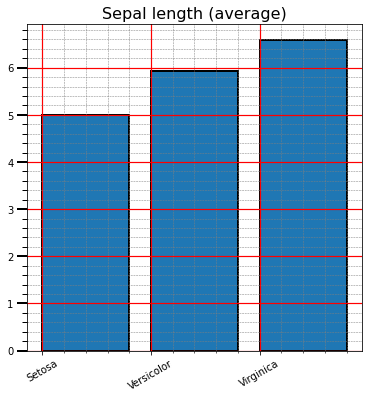

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.set_title('Sepal length (average)', fontsize=16)

ax.grid(which='major', color='red', linewidth=1.2)
ax.grid(which='minor', linestyle='--', color='gray', linewidth=0.5)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'y', which='major', length=10, width=2)
ax.tick_params(axis = 'y', which='minor', length=5, width=1)

ax.bar(flowers, len_list,  align='edge', edgecolor = 'black', linewidth = 2)

plt.xticks(flowers, flowers, rotation = 30)
plt.show()